# Bagging and Ensembling with Random Forest

<b> Goals </b>

- Random Forest model: the ins and outs and how it relates to Decision Trees. Our first **black box** model.
- The concept of bagging and ensembling in the context of machine learning and specifically the Random Forest model.
- Compare and contrast Decision Trees with Random Forest using both the regression and classification of each model.

## Ensembling


Let's pretend that instead of building a single model to solve a binary classification problem, you created **five independent models**, and each model was correct about 70% of the time. If you combined these models into an "ensemble" and used their majority vote as a prediction, how often would the ensemble be correct? Think wisdom of the crowds.

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
%matplotlib inline

C:\Users\yangliu\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:


# set a seed for reproducibility
np.random.seed(1234)

# generate 1000 random numbers (between 0 and 1) for each model, representing 1000 observations
mod1 = np.random.rand(1000)
mod2 = np.random.rand(1000)
mod3 = np.random.rand(1000)
mod4 = np.random.rand(1000)
mod5 = np.random.rand(1000)

# each model independently predicts 1 (the "correct response") if random number was at least 0.3
preds1 = np.where(mod1 > 0.3, 1, 0)
preds2 = np.where(mod2 > 0.3, 1, 0)
preds3 = np.where(mod3 > 0.3, 1, 0)
preds4 = np.where(mod4 > 0.3, 1, 0)
preds5 = np.where(mod5 > 0.3, 1, 0)

# print the first 20 predictions from each model
print preds1[:20]
print preds2[:20]
print preds3[:20]
print preds4[:20]
print preds5[:20]

[0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1]
[1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0]
[1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1]
[1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0]
[0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1]


In [3]:
# average the predictions and then round to 0 or 1
ensemble_preds = np.round((preds1 + preds2 + preds3 + preds4 + preds5)/5.0).astype(int)

# print the ensemble's first 20 predictions
print ensemble_preds[:20]

[1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


In [4]:
# how accurate was each individual model?
print preds1.mean()
print preds2.mean()
print preds3.mean()
print preds4.mean()
print preds5.mean()

0.713
0.665
0.717
0.712
0.687


In [5]:
# how accurate was the ensemble?
print ensemble_preds.mean()

0.841


**Note:** As you add more models to the voting process, the probability of error decreases, which is known as [Condorcet's Jury Theorem](http://en.wikipedia.org/wiki/Condorcet%27s_jury_theorem).

### What is ensembling?

<br>

**Ensemble learning (or "ensembling")** is the process of combining several predictive models in order to produce a combined model that is more accurate than any individual model. Ensemble models are basically models made up of other models. 

- **Regression:** take the average of the predictions
- **Classification:** take a vote and use the most common prediction, or take the average of the predicted probabilities

For ensembling to work well, the models must have the following characteristics:

- **Accurate:** they outperform the null model
- **Independent:** their predictions are generated using different processes

**The big idea:** If you have a collection of individually imperfect (and independent) models, the "one-off" mistakes made by each model are probably not going to be made by the rest of the models, and thus the mistakes will be discarded when averaging the models.

There are two basic **methods for ensembling:**

- Manually ensemble your individual models
- Use a model that ensembles for you

### Manual Ensembling
![Machine learning flowchart](images/crowdflower_ensembling.jpg)

*Machine learning flowchart created by the [winner](https://github.com/ChenglongChen/Kaggle_CrowdFlower) of Kaggle's [CrowdFlower competition](https://www.kaggle.com/c/crowdflower-search-relevance)*

What makes a good manual ensemble?

- Different types of **models**
- Different combinations of **features**
- Different **tuning parameters**

### Comparing manual ensembling with a single model approach

**Advantages of manual ensembling:**

- Increases predictive accuracy
- Easy to get started

**Disadvantages of manual ensembling:**

- Decreases interpretability
- Takes longer to train
- Takes longer to predict
- More complex to automate and maintain
- Small gains in accuracy may not be worth the added complexity

## Random Forest

As you may have already guessed, Random Forest is related to Decision Trees. Knowing what we know about Decision Trees, what do you think Random Forest does?

- Random forest is a collection of decision tree models
- Each decision tree in random forest is usually overfit (don't set max depth)
- To help combat overfitting, each tree is trained on a different set of features (so they can give you different predictions)
- N estimators is how many trees we have in our forest


- Decision Tree is singular while Random Forest is plural. Instead of one decision, we have multiple, a whole forest of decisions.  
- Each tree in the Random Forest gets a vote on deciding the outcome.
- Random Forest is a type of Ensembling because these sub models are Decision Trees. Random Forest generates many Decision Trees and combines them to generate a single prediction through a voting process.
- Random Forest usually better than Decision Trees because it's not as vulnerable to overfitting. This is why Random Forest has become such a popular algorithm for the data scientists.
- Like Decision Trees, you can set the parameters such as maximum number of features. Random Forest also uses the same attributes to determine the split such as gini and [entropy](http://www.saedsayad.com/decision_tree.htm).
- But perhaps the most significant parameter we have to set is the number of trees or estimators in our model, this means we have to "tune" this parameter in order to optimize our model.
- Regression application.


## Bagging

Random forest models do not just create a whole bunch of trees from the same data. They use <b>bagging</b> and a random selection of features to generate different trees. If they didn't use this, then the trees would all be very similar if not the same, which would almost eliminate the point of Random Forest.
<br><br>
<b>Bagging:</b>  General purpose procedure for reducing the variance of a machine learning method. Bagging is short for bootstrap aggregation, meaning the aggregation of bootstrap samples. What is a **bootstrap sample**? A random sample with replacement. 

<br>
Each tree selects a sample of observations/events with replacement to build the training set. Replacement means it chooses the same observation multiple times — only an issue with very small sample datasets. Observation is put "back in the bag" for future use. 

**How does bagging work for Random Forest?**

1. Grow B trees using B bootstrap samples from the training data.
2. Train each tree on its bootstrap sample and make predictions.
3. Combine the predictions:
    - Average the predictions for **regression trees**
    - Take a vote for **classification trees**

Notes:

- **Each bootstrap sample** should be the same size as the original training set.
- **B** should be a large enough value that the error seems to have "stabilized".
- The trees are **grown deep** so that they have low bias/high variance. Means we do not set max_depth.

Bagging increases predictive accuracy by **reducing the variance**, similar to how cross-validation reduces the variance associated with train/test split (for estimating out-of-sample error) by splitting many times an averaging the results.

Random Forest uses a random selection of features for each split. This means for each time it has to perform a split or generate a rule, it is only looking at this random sample of the features as possibilities to generate that rule. This will help avoid the similarity problem because the trees will not be built with the same set features at every point. The number of features is usually determined by $\sqrt{x}$ features are used for classifiers and $x/3$ for regression.
<br><br>
**Whats the point?**

- Suppose there is **one very strong feature** in the data set. When using bagged trees, most of the trees will use that feature as the top split, resulting in an ensemble of similar trees that are **highly correlated**.
- Averaging highly correlated quantities does not significantly reduce variance (which is the entire goal of bagging).
- By randomly leaving out candidate features from each split, **Random Forests "decorrelates" the trees**, such that the averaging process can reduce the variance of the resulting model.

### Pros and Cons of Random Forest

**Pros:**

- No feature preparation such as scaling.
- Effective, beats most Machine Learnings algorithms.
- Fast, can train using data very large in a reasonable amount of time.
- It's hard to build a bad Random forest model.

**Cons:**

- Can grow to be way too large and complex. Models can literally take dozens of MBs in space.
- Not interpretable like a Decision Tree.
- Slower at training and predicting than Decision Trees.
- Not great for when the focus is on probabilities.
- Black box model qualities because there lacks some transparency in the modeling process. It's hard to gain insight into how it comes to conclusions.Requires a bit of faith from the data scientist. 


### Manually implementing bagged decision trees (with B=10)

We're going to use the vehicles dataset to demonstrate bagging for a regresion project.

In [6]:
# set a seed for reproducibility
np.random.seed(1)

# create an array of 1 through 20
nums = np.arange(1, 21)
print nums

# sample that array 20 times with replacement
print np.random.choice(a=nums, size=20, replace=True)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 6 12 13  9 10 12  6 16  1 17  2 13  8 14  7 19  6 19 12 11]


In [8]:
# read in and prepare the vehicle training data

url = '../../data/vehicles_train.csv'
train = pd.read_csv(url)
train['vtype'] = train.vtype.map({"car":0, "truck":1})
train

,price,year,miles,doors,vtype
0,22000,2012,13000,2,0
1,14000,2010,30000,2,0
2,13000,2010,73500,4,0
3,9500,2009,78000,4,0
4,9000,2007,47000,4,0
5,4000,2006,124000,2,0
6,3000,2004,177000,4,0
7,2000,2004,209000,4,1
8,3000,2003,138000,2,0
9,1900,2003,160000,4,0


Create random sets of index values for random sampling

In [9]:
# set a seed for reproducibility
np.random.seed(123)

# create ten bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=14, size=14, replace=True) for _ in range(10)]
samples

#what this is showing is the index value we will use to pick a data point

[array([13,  2, 12,  2,  6,  1,  3, 10, 11,  9,  6,  1,  0,  1]),
 array([ 9,  0,  0,  9,  3, 13,  4,  0,  0,  4,  1,  7,  3,  2]),
 array([ 4,  7,  2,  4,  8, 13,  0,  7,  9,  3, 12, 12,  4,  6]),
 array([ 1,  5,  6, 11,  2,  1, 12,  8,  3, 10,  5,  0, 11,  2]),
 array([10, 10,  6, 13,  2,  4, 11, 11, 13, 12,  4,  6, 13,  3]),
 array([10,  0,  6,  4,  7, 11,  6,  7,  1, 11, 10,  5,  7,  9]),
 array([ 2,  4,  8,  1, 12,  2,  1,  1,  3, 12,  5,  9,  0,  8]),
 array([11,  1,  6,  3,  3, 11,  5,  9,  7,  9,  2,  3, 11,  3]),
 array([ 3,  8,  6,  9,  7,  6,  3,  9,  6, 12,  6, 11,  6,  1]),
 array([13, 10,  3,  4,  3,  1, 13,  0,  5,  8, 13,  6, 11,  8])]

In [11]:
# show the rows for the first decision tree
train.iloc[samples[0], :]

,price,year,miles,doors,vtype
13,1300,1997,138000,4,0
2,13000,2010,73500,4,0
12,1800,1999,163000,2,1
2,13000,2010,73500,4,0
6,3000,2004,177000,4,0
1,14000,2010,30000,2,0
3,9500,2009,78000,4,0
10,2500,2003,190000,2,1
11,5000,2001,62000,4,0
9,1900,2003,160000,4,0


In [12]:
# read in and prepare the vehicle testing data
url = '../../data/vehicles_test.csv'
test = pd.read_csv(url)
test['vtype'] = test.vtype.map({"car": 0, "truck": 1})
test

,price,year,miles,doors,vtype
0,3000,2003,130000,4,1
1,6000,2005,82500,4,0
2,12000,2010,60000,2,0


In [14]:


# grow each tree deep
treereg = DecisionTreeRegressor(max_depth=None, random_state=123)

# list for storing predicted price from each tree
predictions = []

# define testing data
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

# grow one tree for each bootstrap sample and make predictions on testing data
for sample in samples:
    X_train = train.iloc[sample, 1:]
    y_train = train.iloc[sample, 0]
    treereg.fit(X_train, y_train)
    y_pred = treereg.predict(X_test)
    predictions.append(y_pred)

# convert predictions from list to NumPy array
predictions = np.array(predictions)
predictions

array([[  1300.,   5000.,  14000.],
       [  1300.,   1300.,  13000.],
       [  3000.,   3000.,  13000.],
       [  4000.,   5000.,  13000.],
       [  1300.,   5000.,  13000.],
       [  4000.,   5000.,  14000.],
       [  4000.,   4000.,  13000.],
       [  4000.,   5000.,  13000.],
       [  3000.,   5000.,   9500.],
       [  4000.,   5000.,   9000.]])

10 rows of prediction for each of the ten samples. 3 columns for each car in the in test dataset.

In [16]:
# average predictions
predictions.mean(axis = 0)

array([  2990.,   4330.,  12450.])

In [18]:
# calculate RMSE

y_pred = predictions.mean(axis = 0)
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

998.58232843700307

The square root mean squared error tells us the average amount you're off is $1000. How good this is depends on your budget for car - e.g. for first two cars it's not very good; for the 3rd car, may be acceptable

Let's calculate RMSE by training the whole dataset on a Decision Tree Regressor


In [19]:
treereg = DecisionTreeRegressor(max_depth=None, random_state=123)
treereg.fit(train.iloc[:, 1:], train.iloc[:, 0])
preds = treereg.predict(X_test)
#RMSE
np.sqrt(metrics.mean_squared_error(y_test, preds))

1414.2135623730951

- The above uses a single decision tree and we use this as a baseline to see how much we improve with random forest
- The RMSE is higher than the RMSE for the 10 models that we had before. Therefore having the 10 models helped improve overall performance

### Bagged decision trees in scikit-learn (with estimators=500)

In [20]:
# define the training and testing sets
X_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

In [21]:
# instruct BaggingRegressor to use DecisionTreeRegressor as the "base estimator"

bagreg = BaggingRegressor(DecisionTreeRegressor(),
                          n_estimators=500,
                          bootstrap=True,
                          oob_score=True, random_state=1)

- n_estimates = 500 means that this RF will contain 500 decision tree models

In [22]:
# fit and predict
bagreg.fit(X_train, y_train)
y_pred = bagreg.predict(X_test)
y_pred

array([  3344.2,   5395. ,  12902. ])

In [23]:
# calculate RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

657.80003040437748

- We have now reduced the error from the baseline by half (from 1,400)
- Before with the 1000 error, we only had 10 decision trees

In [24]:
#Use RandomForest regression to caculate RMSE



#Intialize
rfe = RandomForestRegressor(n_estimators = 500)

#Fit
rfe.fit(X_train, y_train)

#Predictions
y_pred = rfe.predict(X_test)

# calculate RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

637.32451179390034

- Random forest uses different features vs. previous bagreg example uses the same features

### Estimating out-of-sample error

For bagged models, out-of-sample error can be estimated without using train/test split or cross-validation

On average, each bagged tree uses about **two-thirds** of the observations. For each tree, the **remaining observations** are called "out-of-bag" observations.

- What random forest does is validates each tree againist data that it is not trained against (out of bag observations) to see how well it does

In [26]:
# show the first bootstrap sample
samples[0]

array([13,  2, 12,  2,  6,  1,  3, 10, 11,  9,  6,  1,  0,  1])

In [27]:
# show the "in-bag" observations for each sample
for sample in samples:
    print set(sample)

set([0, 1, 2, 3, 6, 9, 10, 11, 12, 13])
set([0, 1, 2, 3, 4, 7, 9, 13])
set([0, 2, 3, 4, 6, 7, 8, 9, 12, 13])
set([0, 1, 2, 3, 5, 6, 8, 10, 11, 12])
set([2, 3, 4, 6, 10, 11, 12, 13])
set([0, 1, 4, 5, 6, 7, 9, 10, 11])
set([0, 1, 2, 3, 4, 5, 8, 9, 12])
set([1, 2, 3, 5, 6, 7, 9, 11])
set([1, 3, 6, 7, 8, 9, 11, 12])
set([0, 1, 3, 4, 5, 6, 8, 10, 11, 13])


In [28]:
# show the "out-of-bag" observations for each sample
for sample in samples:
    print sorted(set(range(14)) - set(sample))

[4, 5, 7, 8]
[5, 6, 8, 10, 11, 12]
[1, 5, 10, 11]
[4, 7, 9, 13]
[0, 1, 5, 7, 8, 9]
[2, 3, 8, 12, 13]
[6, 7, 10, 11, 13]
[0, 4, 8, 10, 12, 13]
[0, 2, 4, 5, 10, 13]
[2, 7, 9, 12]


How to calculate **"out-of-bag error":**

1. For every observation in the training data, predict its response value using **only** the trees in which that observation was out-of-bag. Average those predictions (for regression) or take a vote (for classification).
2. Compare all predictions to the actual response values in order to compute the out-of-bag error.

When n_estimators is sufficiently large, the **out-of-bag error** is an accurate estimate of **out-of-sample error**.

In [29]:
# compute the out-of-bag R-squared score (not MSE, unfortunately!) for n_estimators=500
bagreg.oob_score_

0.79869551339899825

### Estimating feature importance

Bagging increases **predictive accuracy**, but decreases **model interpretability** because it's no longer possible to visualize the tree to understand the importance of each feature.

However, we can still obtain an overall summary of **feature importance** from bagged models:

- **Bagged regression trees:** calculate the total amount that **MSE** is decreased due to splits over a given feature, averaged over all trees
- **Bagged classification trees:** calculate the total amount that **Gini index** is decreased due to splits over a given feature, averaged over all trees

## Building and Tuning Decision Trees and Random Forest Models

- Major League Baseball player data from 1986-87: [data](https://github.com/justmarkham/DAT8/blob/master/data/hitters.csv), [data dictionary](https://cran.r-project.org/web/packages/ISLR/ISLR.pdf) (page 7)
- Each observation represents a player
- **Goal:** Predict player salary

In [30]:
# read in the data
path = '../../data/hitters.csv'
hitters = pd.read_csv(path)

# remove rows with missing values
hitters.dropna(inplace = True)

#View data
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [31]:
#lower case column names

hitters.columns = hitters.columns.str.lower()

In [32]:
hitters.head(1)

,atbat,hits,hmrun,runs,rbi,walks,years,catbat,chits,chmrun,cruns,crbi,cwalks,league,division,putouts,assists,errors,salary,newleague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N


In [33]:
# encode categorical variables as integers
hitters['league'] = pd.factorize(hitters.league)[0]
hitters['division'] = pd.factorize(hitters.division)[0]
hitters['newleague'] = pd.factorize(hitters.newleague)[0]
hitters.head()

,atbat,hits,hmrun,runs,rbi,walks,years,catbat,chits,chmrun,cruns,crbi,cwalks,league,division,putouts,assists,errors,salary,newleague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,0,0,632,43,10,475.0,0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,1,0,880,82,14,480.0,1
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,0,1,200,11,3,500.0,0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,0,1,805,40,4,91.5,0
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,1,0,282,421,25,750.0,1


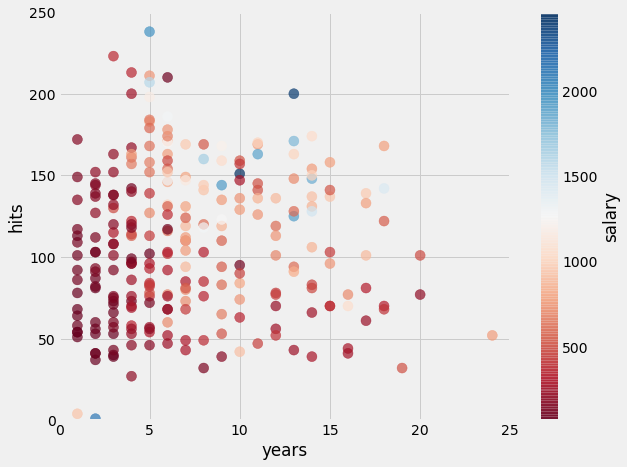

In [34]:
#Scatter plot of years versus hits colored by salary

plt.style.use("fivethirtyeight")
hitters.plot(kind='scatter', x='years', y='hits',
             c='salary', cmap=plt.cm.get_cmap('RdBu'), s = 100, alpha = .7,
             xlim=(0, 25), ylim=(0, 250), figsize=(9, 7));

In [35]:
# define features: exclude career statistics (which start with "C") and the response (Salary)
feature_cols = [h for h in hitters.columns if h[0] != 'c' and h != 'salary']
feature_cols

['atbat',
 'hits',
 'hmrun',
 'runs',
 'rbi',
 'walks',
 'years',
 'league',
 'division',
 'putouts',
 'assists',
 'errors',
 'newleague']

In [36]:
# define X and y
X = hitters[feature_cols]
y = hitters.salary

### Predicting salary with a decision tree

Find the best max_depth for a decision tree using cross-validation:

In [39]:
# list of values from 1 - 21 to try for max_depth
max_depth_range = range(1, 21)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use 5-fold cross-validation with each value of max_depth

for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth= depth, random_state = 500)
    MSE_scores = cross_val_score(treereg, X, y, cv = 5, scoring = "neg_mean_squared_error")
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

# The way scikit learn is designed, they give you a negative mean squared error, so to calculate square root, you must make it positive first

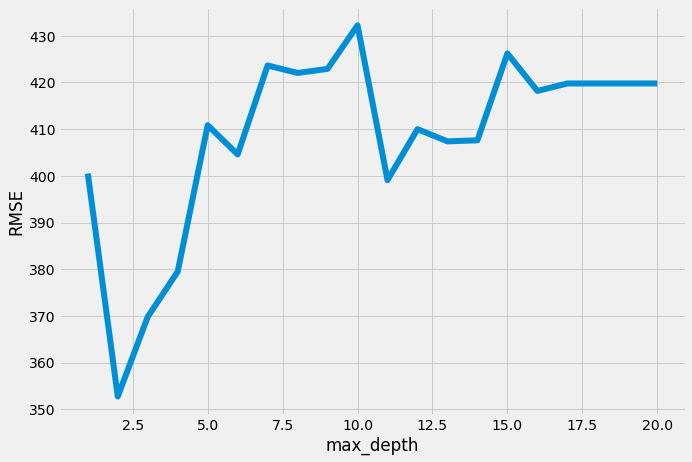

In [40]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.figure(figsize=(10, 7))
plt.plot(max_depth_range, RMSE_scores, linewidth = 6)
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.show()

- Lowest mean squared error exists around 2

Whats the best max_depth?

In [42]:
# show the best RMSE and the corresponding max_depth
sorted(zip(RMSE_scores, max_depth_range))[0]
#sorted[0] will give you the smallest score first

(352.74208236397016, 2)

In [44]:
# max_depth=2 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=2, random_state = 500)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=500, splitter='best')

In [45]:
# compute feature importances
pd.DataFrame({'feature':feature_cols, 
              'importance':treereg.feature_importances_}).sort_values('importance', ascending = False)

,feature,importance
6,years,0.488391
1,hits,0.375880
5,walks,0.135729
0,atbat,0.000000
2,hmrun,0.000000
3,runs,0.000000
4,rbi,0.000000
7,league,0.000000
8,division,0.000000
9,putouts,0.000000


### Predicting salary with a Random Forest

In [46]:

#Intialize
rfreg = RandomForestRegressor()
#Show model details
rfreg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

#### Tuning n_estimators

One important tuning parameter is **n_estimators**, which is the number of trees that should be grown. It should be a large enough value that the error seems to have "stabilized". We want to reach a point of diminishing marginal returns.

In [48]:
# list of values from 10 to 210 in intervals of 10 to try for n_estimators
estimator_range = range(10, 210, 10)

# list to store the average RMSE for each value of n_estimators
RMSE_scores = []

# use 5-fold cross-validation with each value of n_estimators. Will take a while.

for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state = 150)
    MSE_scores = cross_val_score(rfreg, X, y, cv = 5, scoring = "neg_mean_squared_error")
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
    

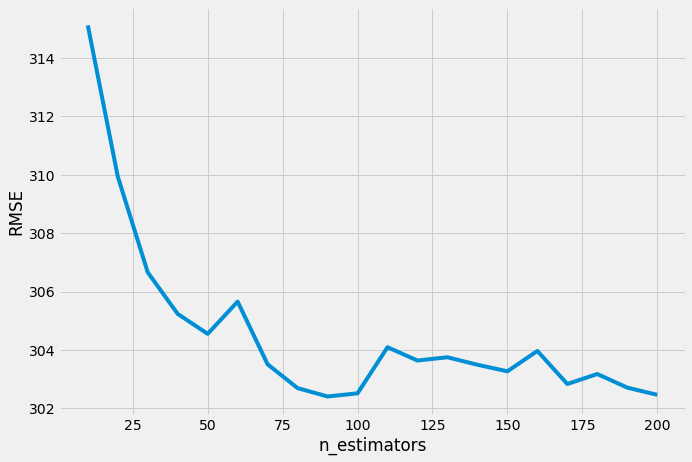

In [49]:
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.figure(figsize=(10, 7))
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE');

In [50]:
#Best estimator
sorted(zip(RMSE_scores, estimator_range))[0]

(302.40265150099441, 90)

#### Tuning max_features

The other important tuning parameter is **max_features**, which is the number of features that should be considered at each split.

In [ ]:
#len(feature_cols) = 14

In [52]:
# list of values to try for max_features
feature_range = range(1, len(feature_cols)+1)

# list to store the average RMSE for each value of max_features
RMSE_scores = []

# use 5-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=150, max_features=feature, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

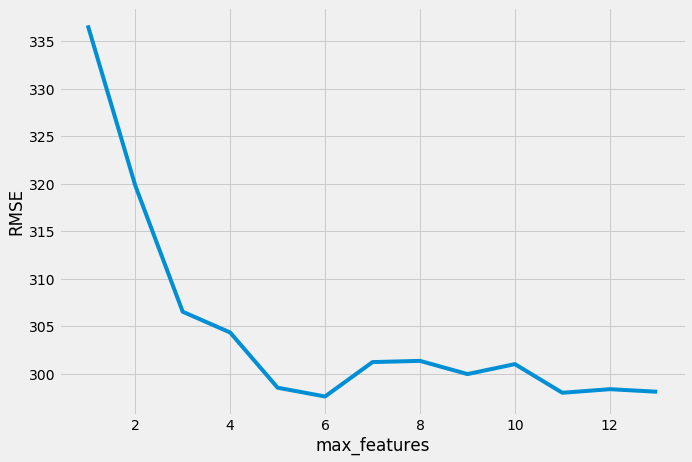

In [53]:
# plot max_features (x-axis) versus RMSE (y-axis)
plt.figure(figsize=(10, 7))
plt.plot(feature_range, RMSE_scores)
plt.xlabel('max_features')
plt.ylabel('RMSE');

In [54]:
# show the best RMSE and the corresponding max_features
sorted(zip(RMSE_scores, feature_range))[0]

(297.62432690051793, 6)

#### Fitting a Random Forest with the best parameters

In [55]:
# max_features=6 is best and n_estimators=90 is sufficiently large
rfreg = RandomForestRegressor(n_estimators=90, max_features=6, oob_score = True, random_state = 1)
rfreg.fit(X,y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=90, n_jobs=1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [56]:
# compute feature importances
pd.DataFrame({'feature':feature_cols,
              'importance':rfreg.feature_importances_}).sort_values('importance', ascending = False)

,feature,importance
6,years,0.234695
1,hits,0.156271
5,walks,0.133418
4,rbi,0.130905
0,atbat,0.092427
3,runs,0.075304
9,putouts,0.064144
2,hmrun,0.039576
11,errors,0.030836
10,assists,0.026612


In [57]:
# compute the out-of-bag R-squared score
rfreg.oob_score_

#function that ends in underscore means that this feature doesn't exist before you fit it
#interpret oob score in same way as cross-validation function

0.52683187316353508

In [58]:
cross_val_score(rfreg, X, y, cv = 5, scoring = "r2").mean()

0.52944506189162133

### Reducing X to its most important features

In [59]:
# check the shape of X
X.shape

(263, 13)

In [68]:
rfreg = RandomForestRegressor(n_estimators=90, oob_score=True, random_state=1)
rfreg.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=1,
           oob_score=True, random_state=1, verbose=0, warm_start=False)

In [69]:
# set a threshold for which features to include
print rfreg.transform(X, threshold=0.1).shape

rfreg.transform(X, threshold=0.1)


AttributeError: 'RandomForestRegressor' object has no attribute 'transform'

In [63]:
#Use the mean threshold
rfreg.transform(X, threshold='mean')

AttributeError: 'RandomForestRegressor' object has no attribute 'transform'

In [64]:
# create a new feature matrix that only includes important features
X_important = rfreg.transform(X, threshold='mean')

AttributeError: 'RandomForestRegressor' object has no attribute 'transform'

In [65]:
# check the RMSE for a Random Forest that only includes important features
rfreg = RandomForestRegressor(n_estimators=90, max_features=9, random_state=1)
scores = cross_val_score(rfreg, X_important, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

NameError: name 'X_important' is not defined

In [ ]:
# check the RMSE for a Random Forest that includes ALL features ( for comparison )
rfreg = RandomForestRegressor(n_estimators=150, max_features=3, random_state=1)
scores = cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

## Visualizing Decision Trees versus Random Forest

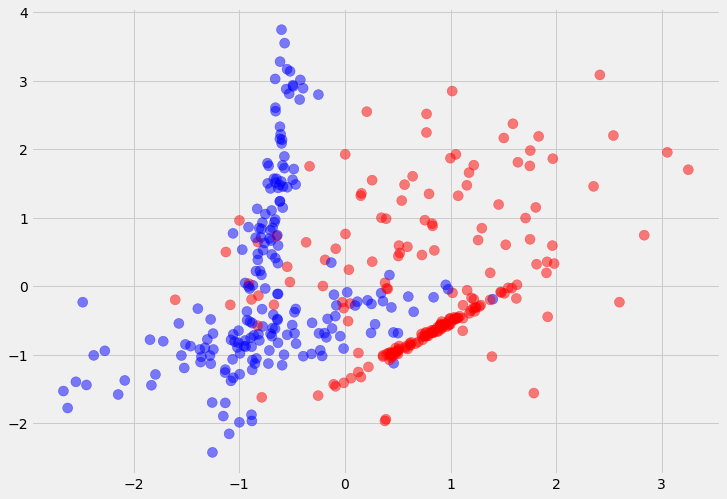

In [70]:


#Generate fake data that is 400 x 2.
data = make_classification(n_samples=400, n_features=2, n_informative=2, n_redundant=0, 
                    class_sep=.74, random_state = 28)

df = pd.DataFrame(data[0], columns=["feature1", "feature2"])
#Add target variable to df 
df["target"] = data[1]

#Call scatter plot of feature1 vs feature2 with color-encoded target variable

plt.figure(figsize=(11, 8))
#Color encode target variable
colors = df.target.map({0:"b", 1:"r"})
plt.scatter(df.feature1, df.feature2, c = colors, s = 100, alpha=.5);

In [71]:
#Assign X and y
X = df.drop("target", axis = 1)
y = df.target

#Fit a Decision Tree model with 5 max_depth on the data.

dt = DecisionTreeClassifier(max_depth=5)

dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [72]:
#Decision boundary function
def plot_decision_boundary(model, X, y):
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    xticks = np.linspace(X_min[0], X_max[0], 100)
    yticks = np.linspace(X_min[1], X_max[1], 100)
    xx, yy = np.meshgrid(xticks, yticks)
    ZZ = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = ZZ >= 0.5
    Z = Z.reshape(xx.shape)
    plt.rcParams["figure.figsize"] = (10,7)
    fig, ax = plt.subplots()
    ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.2)
    ax.scatter(X[:,0], X[:,1], c=y, alpha=0.4, s = 50)

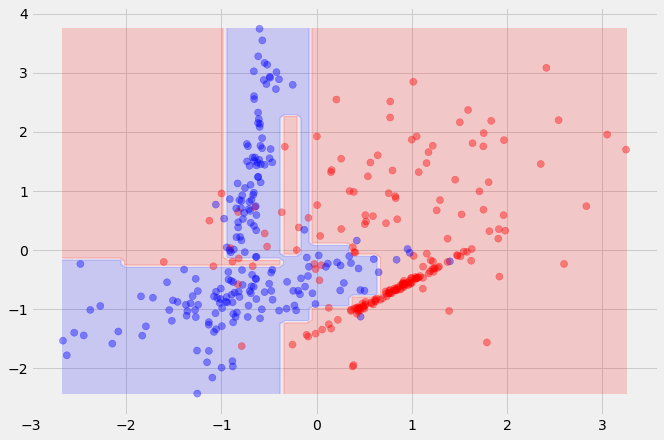

In [73]:
#Feed dt model, features and colors
plot_decision_boundary(dt, X.values, colors);

Fit RF model on data and visualize it

In [74]:


#Use estimators = 30
rf = RandomForestClassifier(n_estimators = 50)

#Fit model
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

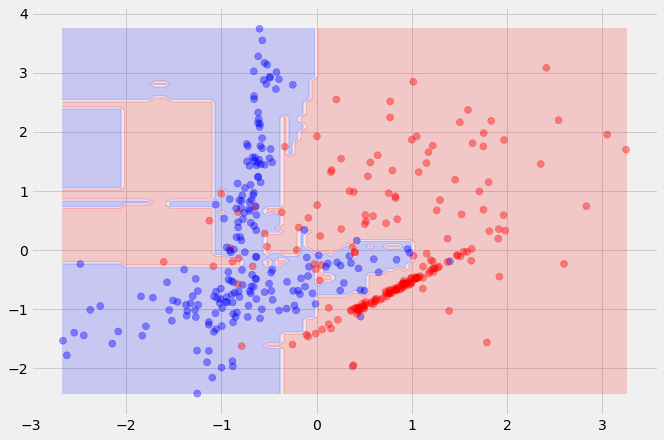

In [75]:
#Feed rf model, features and colors
plot_decision_boundary(rf, X.values, colors);

## Resources

- http://blog.datadive.net/interpreting-random-forests/
- http://blog.datadive.net/random-forest-interpretation-with-scikit-learn/
- https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.08-Random-Forests.ipynb
- https://aysent.github.io/2015/11/08/random-forest-leaf-visualization.html
- https://medium.com/rants-on-machine-learning/the-unreasonable-effectiveness-of-random-forests-f33c3ce28883
- https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/
- http://paolaelefante.com/2016/03/a-small-guide-to-random-forest-part-2/
- https://www.youtube.com/watch?v=QHOazyP-YlM
- https://www.youtube.com/watch?v=loNcrMjYh64
- https://machinelearningmastery.com/bagging-and-random-forest-ensemble-algorithms-for-machine-learning/
- https://machinelearningmastery.com/implement-bagging-scratch-python/
- https://towardsdatascience.com/enchanted-random-forest-b08d418cb411
- https://github.com/Miguel75An/Random-Forests-with-Iris-Data

## Classifying Employee Churn with Decision Trees and Random Forest

In class exercise in which we will apply both the Decision Trees and Random Forest models to the Employee Churn data. We'll compare and contrast the performances of both models using this dataset.

In [84]:
df = pd.read_csv('../../data/HR_comma_sep.csv')

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [86]:
# remove rows with missing values
df.dropna(inplace=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [87]:
# encode categorical variables as integers
df['sales'] = pd.factorize(df.sales)[0]
df['salary'] = pd.factorize(df.salary)[0]
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


In [88]:
# define features: exclude response (left)
feature_cols = [c for c in df.columns if c != 'left']
feature_cols

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'sales',
 'salary']

In [89]:
# define X and y
X = df[feature_cols]
y = df.left

In [90]:
# list of values to try for max_depth
max_depth_range = range(1, 21)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use 5-fold cross-validation with each value of max_depth

for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

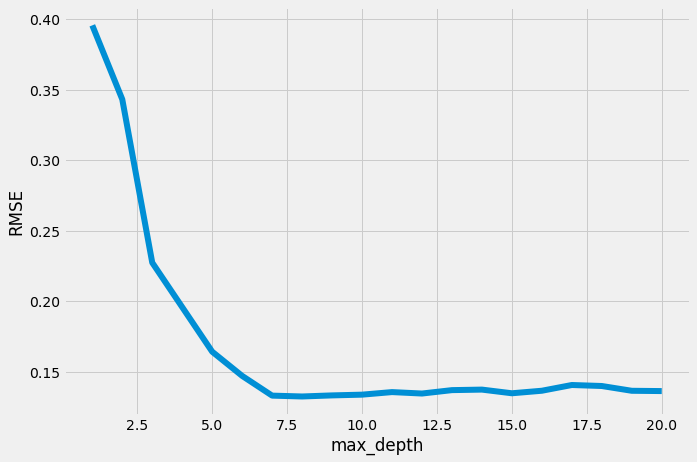

In [91]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.figure(figsize=(10, 7))
plt.plot(max_depth_range, RMSE_scores, linewidth = 6)
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.show()

In [92]:
# show the best RMSE and the corresponding max_depth
sorted(zip(RMSE_scores, max_depth_range))[0]

(0.1325316878527984, 8)

In [93]:
# max_depth=8 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=8, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [94]:
pd.DataFrame({'feature':feature_cols, 
              'importance':treereg.feature_importances_}).sort_values('importance', ascending = False)

,feature,importance
0,satisfaction_level,0.524433
4,time_spend_company,0.148797
1,last_evaluation,0.143082
2,number_project,0.107041
3,average_montly_hours,0.074974
8,salary,0.001573
7,sales,0.000100
5,Work_accident,0.000000
6,promotion_last_5years,0.000000
